## Foundations: Clean Data

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Read The Data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
titanic = pd.read_csv('titanic.csv')
titanic.head()
df = titanic

### Print the total len of the dataframe and the names of the columns

In [ ]:
<add your code here>

#### Print the total mean of Survived

In [ ]:
<add your code here>

### Print Some Statistic
Each row represents one person. 

The columns describe different attributes about the person including whether they 
survived `(S)`, their age `(A)`, their passenger-class `(C)`, their sex `(G)` and the fare they paid `(X)`.

#### [Quetion] Calculate the conditional probability that a person survives given their sex and passenger-class:
P(S= true | G=female,C=1)

P(S= true | G=female,C=2)

P(S= true | G=female,C=3)

P(S= true | G=male,C=1)

P(S= true | G=male,C=2)

P(S= true | G=male,C=3)

[Guiding]
Calculating the probability of a relevant survived group to need first to the amount of survives divided by the total amount of the group. 
For example: `len(df[(df["Survived"]==1) & (df["Sex"]=="female")])` will provide the number of female passenger that are survived. So you need to add a condition of `class=1` to find the total number of female passenger belong to first class that are survived.

Use the same principle to calculate the total numer of female passeger belong to first class.
Then calculate all of the following.

In [13]:
print('the len of female passenger that are survived: ', len(titanic[(df["Survived"]==1) & (df["Sex"]=="female")]))

the len of female passenger that are survived:  233


### Fare Avrage
[`Quetion`] calculate the total fare mean and the fare mean of each class. Use column `Pclass` [1,2,3] to select each class.
The mean is calculate by the method `.mean()`

In [ ]:
print("Average fare of all passengers -->   {:.4f}".format(<add the code here>)
      
# How much you have to pay for the different classes in average?
print("First class mean cost -->  {:.4f}".format(<add the code here>)
print("Second class mean cost -->  {:.4f}".format(<add the code here>)
print("Third class mean cost -->  {:.4f}".format(<add the code here>)

### Age 
[`question`] find the mean, min and max of Age column

In [ ]:
# average age of all passengers
print("Average age of all passengers -->  {0:.1f}".format(<add your code here>)
print("Age of oldest passenger -->  {:.1f}".format(<add your code here>)
print("Age of youngest passenger -->  {:.1f}".format(<add your code here>)

### Plot Data
Use the method `sns.countplot` to plot a bar of relevent column.<br>
Pass two parameters to the function `x=the-column-name` and `data=df`
Plot the colum of `Survived` and title it with `plt.title` method

In [ ]:
<add you code here>

Use the `hue` argument to split the bar one for 'Sex and other for 'Pclass`

In [ ]:
<add here count plot to display people survived from different sex>

In [ ]:
<add here count plot to display people survived from different class>

Use the method `sns.distplot` to display the the fare distribution and the costs from the different classes.

In [ ]:
<add you code here>

Use distplot to display number of sibling and spouses on board for each passenger
- use `sns.distplot`
- use the column `df['SibSp]` with parameter `kde=False`

/tmp/ipykernel_6837/185859527.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SibSp"], kde=False)


Text(0.5, 1.0, 'Number of siblings and spouses on board of each passenger')

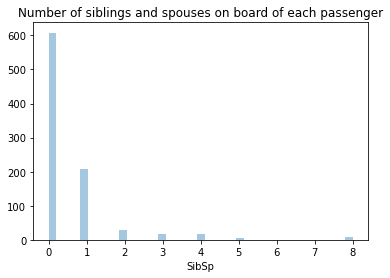

In [14]:
sns.distplot(df["SibSp"], kde=False)
plt.title("Number of siblings and spouses on board of each passenger")

Use the method `sns.distplot` to display the distribution of the ages of the passengers.
Add title `Ages of passengers` by using plt.title

In [ ]:
<add you code here>

# Data Preperation

We have three types of columns. One is columns with numerical values like `Fare`.<br>
Second types are `categorial columns`. Those columns include categorial values like 'Sex', 'Cabin', 'Embarked'.<br>
The Third type is `output columns`, in our case it is `Survived`<br>

We need to convert none number values (like female, male in case of a 'Sex' column) to a numerical value.<br>
Pandas support datatype call 'category'. It enable to automatiicly convert it into numbers. 

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
input_cols = [title for title in df.columns[1:] if title != 'Name']
categorical_cols = ["Sex"]
output_cols = ["Survived"]

print('input_cols:', input_cols)
print('categorical_cols:', categorical_cols)

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [16]:
df['Sex'].astype('category').cat.codes

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int8

In [ ]:
dataframe1 = dataframe.copy(deep=True)